In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps

import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
songs = pd.read_csv('../data/SpotifyCleanedClassification.csv')

In [3]:
songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [16]:
songs_class = songs.copy(deep = True)

In [17]:
songs_class['is_popular'] = 0

In [18]:
popularity_threshold = 40

songs_class.loc[songs_class.popularity > popularity_threshold, "is_popular"] = 1

In [43]:
category_columns = ['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature']

for label in category_columns:
    songs_class[label] = LabelEncoder().fit(songs_class[label]).transform(songs_class[label])

In [45]:
## all columns

#['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
#       'acousticness', 'danceability', 'duration_ms', 'energy',
#       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
#       'speechiness', 'tempo', 'time_signature', 'valence']

#features = ['acousticness', 'danceability', 'duration_ms', 'energy',
#       'instrumentalness', 'liveness', 'loudness',
#       'speechiness', 'tempo', 'valence']

features = ['genre', 'artist_name', 'track_name',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

X = songs_class[features]

y = songs_class.is_popular

In [46]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7805370433429002


In [49]:
regr_1 = DecisionTreeRegressor(max_depth = 1)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [54]:
X_train.track_name[1:20]

16788     32762
99919     54660
48818     41992
120177    30946
64546     55099
58207     77878
487       15843
103171    62370
114834     7651
62427     28460
42024     35429
50697     85385
38221     72132
58949     80776
86589     50813
77840     24633
86669     76152
89450      6153
6340      40743
Name: track_name, dtype: int32

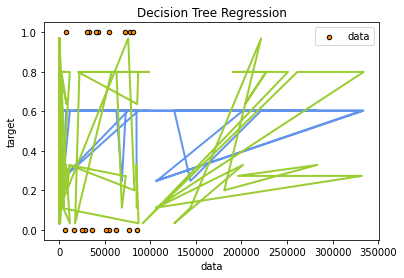

In [57]:
# Plot the results
plt.figure()
plt.scatter(X_train.track_name[1:20], y_train[1:20], s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test[1:20], y_1[1:20], color="cornflowerblue", linewidth=2)
plt.plot(X_test[1:20], y_2[1:20], color="yellowgreen", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

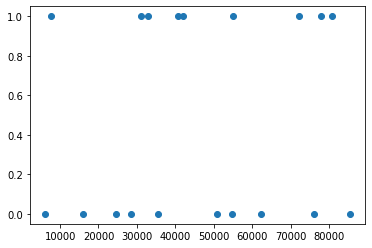

In [55]:
plt.scatter(X_train.track_name[1:20], y_train[1:20])